## BARREL Create Background Model


### Setup
Start by importing libraries and loading data from a potentially interesting event.

In this guide, we are going to use interactive plots, so `%matplotlib ipympl` should be set.

In [78]:
%matplotlib ipympl
import pyspedas, pytplot, numpy
from datetime import datetime

For our example, we will look at data form flight 1G from January 17th - 19th, 2013.

FSPC and SSPC data can be downloaded with the `pyspedas.barrel` helper functions:

In [6]:
trange=['2013-01-17', '2013-01-19']

pyspedas.barrel.fspc(
    trange=trange,
    probe='1G'
)

pyspedas.barrel.sspc(
    trange=trange,
    probe='1G'
)

21-Sep-23 07:35:05: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130117_v10.cdf
21-Sep-23 07:35:05: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130118_v10.cdf
21-Sep-23 07:35:38: File is current: barrel_data/l2/1g/sspc/bar_1g_l2_sspc_20130117_v10.cdf
21-Sep-23 07:35:38: File is current: barrel_data/l2/1g/sspc/bar_1g_l2_sspc_20130118_v10.cdf


['brl1G_Quality',
 'brl1G_SSPC',
 'brl1G_Peak_511',
 'brl1G_SSPC_UNCAL',
 'brl1G_Quality',
 'brl1G_SSPC',
 'brl1G_Peak_511',
 'brl1G_SSPC_UNCAL']

### Background subtraction
Plot FSPC1 for the loaded data and visually determine the start and stop locations for the background selection.

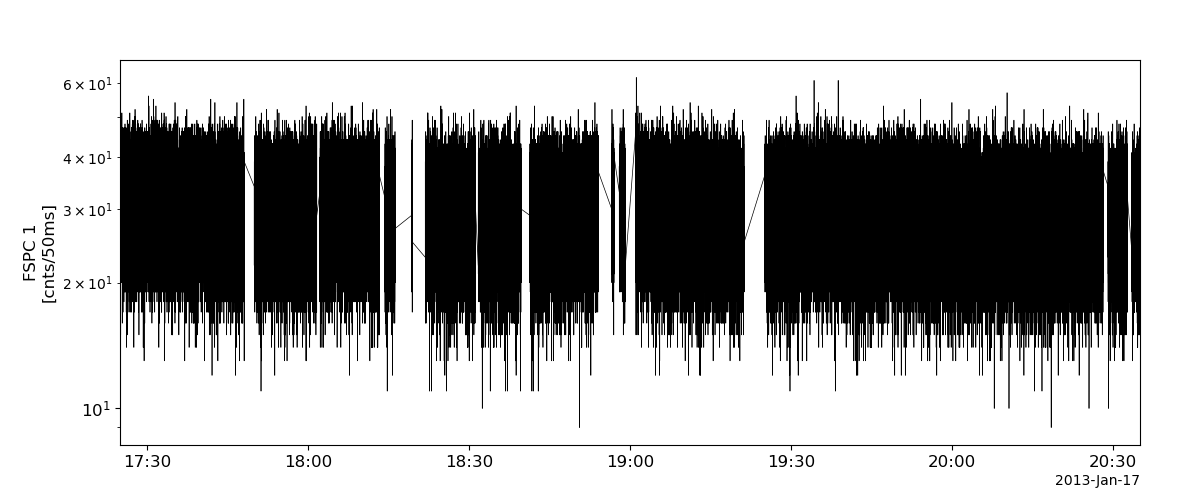

In [92]:
pytplot.tplot('brl1G_FSPC1')

By moving the mouse cursor over a quite area of the plot, we can estimate values for the start and stop times.

In [61]:
bkg_start="2013-01-17/17:25"
bkg_end="2013-01-17/20:35"

Next, we will extract the SSPC data during that time range so we can calcuate the background.

In [88]:

#convert timestamps to seconds since UNIX eopch
epoch = datetime(1970, 1, 1)
ts, cnts, energy_levels = pytplot.get_data('brl1G_SSPC')

bkg_start_seconds = (datetime.strptime(bkg_start, "%Y-%m-%d/%H:%M") - epoch).total_seconds()
bkg_end_seconds = (datetime.strptime(bkg_end, "%Y-%m-%d/%H:%M") - epoch).total_seconds()

#create a boolean mask and apply it to the sspc data
mask = (ts >= bkg_start_seconds) & (ts <= bkg_end_seconds)
bkg_cnts = cnts[mask]
times = ts[mask]


With the background section of data extracted, we will average it over time to get a background spectrum.

In [83]:
bkg_spec = numpy.mean(bkg_cnts, axis=0)

Next, we will subtract our background spectrum.

In [85]:
bkg_sub_cnts = cnts - bkg_spec

Finally, we can create a new tplot variable containing out background-subtracted spectra and plot it.

21-Sep-23 14:47:26: /home/wrexroad/anaconda3/envs/pybdas/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)



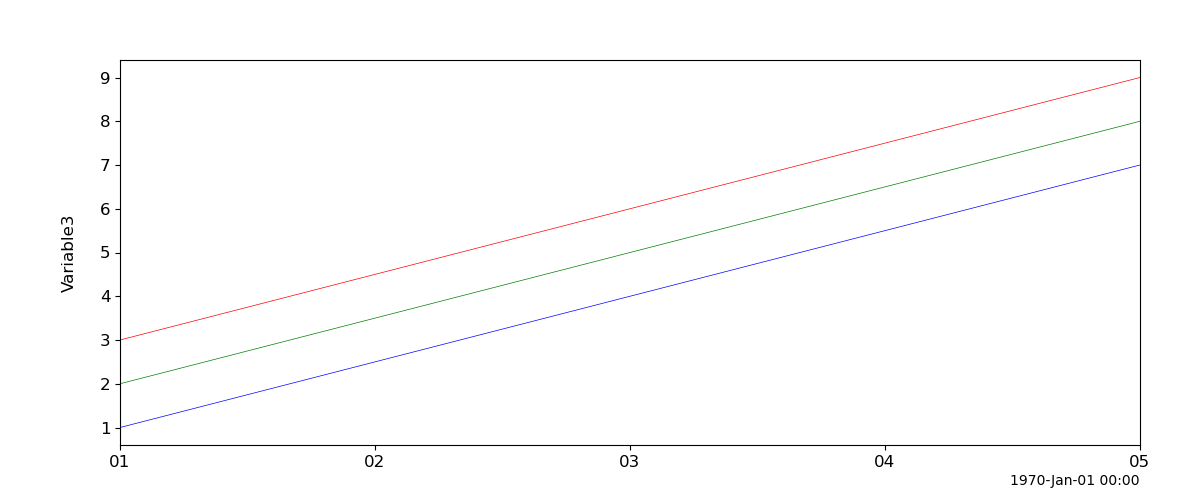

In [106]:
x_data = [1,3,5]
y_data = [ [1,2,3] , [4,5,6], [7,8,9] ]#[[1,5],[2,4],[3,3],[4,2],[5,1]]
v_data = [1,2,3]

pytplot.store_data("Variable3", data={'x':x_data, 'y':y_data, 'v':v_data})
pytplot.tlimit([1,5])
pytplot.tplot("Variable3")

21-Sep-23 14:49:48: /home/wrexroad/anaconda3/envs/pybdas/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)

21-Sep-23 14:49:49: No data found in the time range: brl1G_SSPC_SUB_BKG


0 : brl1G_Quality
1 : brl1G_FSPC1
2 : brl1G_FSPC2
3 : brl1G_FSPC3
4 : brl1G_FSPC4
5 : brl1G_SSPC
6 : brl1G_Peak_511
7 : brl1G_SSPC_UNCAL
8 : brl1G_SSPC_SUB_BKG
9 : Variable1
10 : Variable3
['brl1G_Quality', 'brl1G_FSPC1', 'brl1G_FSPC2', 'brl1G_FSPC3', 'brl1G_FSPC4', 'brl1G_SSPC', 'brl1G_Peak_511', 'brl1G_SSPC_UNCAL', 'brl1G_SSPC_SUB_BKG', 'Variable1', 'Variable3']


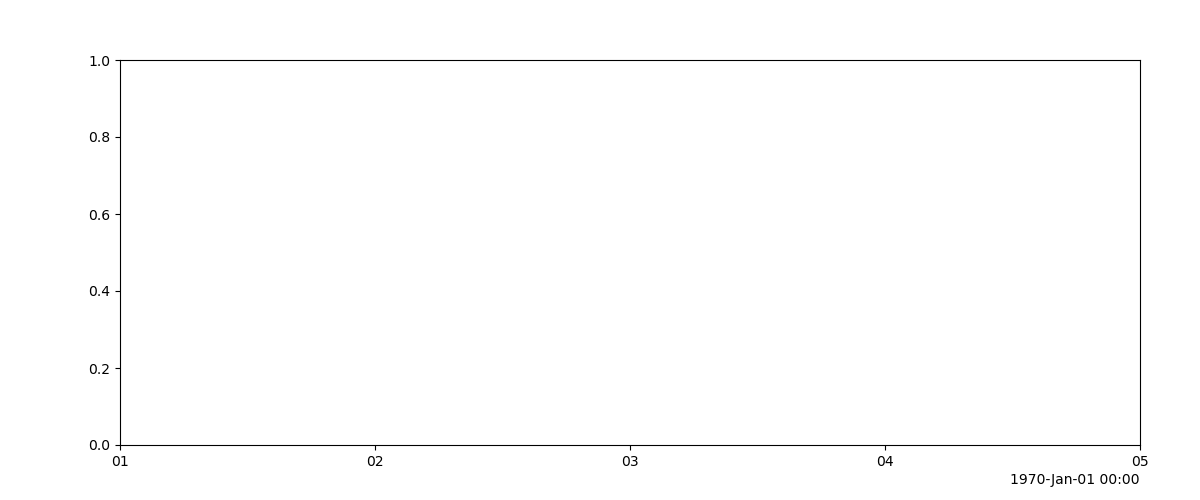

In [112]:
pytplot.store_data("brl1G_SSPC_SUB_BKG1", data={'x':ts, 'y': bkg_sub_cnts})
print(pytplot.tplot_names())
pytplot.tplot("brl1G_SSPC_SUB_BKG1")